<a href="https://colab.research.google.com/github/GreeshmaHarids/Greeshma_Meta_Scifor_Technology/blob/main/Machine_Learning/Week_Assessments/Test_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Algorithm Questions



### 1.   **How does regularization (L1 and L2) help in preventing overfitting?**

Regularization helps reduce overfitting by penalizing large weights in a model, encouraging it to generalize better:

L1 Regularization (Lasso): Pushes some weights to zero, effectively selecting only the most important features.

L2 Regularization (Ridge): Reduces the size of large weights without eliminating them, simplifying the model while keeping all features.








### 2.   **Why is feature scaling important in gradient descent?**



Feature scaling is important in gradient descent because it ensures that all features contribute equally to the optimization process. When features have different scales, the gradients can become unbalanced, causing the algorithm to take inefficient steps and slowing down convergence. Scaling brings features to a similar range, making the optimization smoother, faster, and more accurate.


## Problem Solving


### 3.  **Given a dataset with missing values, how would you handle them before training an ML model?**

To handle missing values effectively, you can either remove rows with missing data using dropna() or fill them using fillna(). When filling missing values, the approach depends on the type of data. For numerical columns, you can use the mean if the data is normally distributed or the median if the data is skewed. For categorical columns, the mode is commonly used for imputation. Analyzing the distribution of each column beforehand helps in choosing the most suitable method, leading to better results. Remove rows/columns with high missing percentages if imputation isn't feasible.

### 4.  **Design a pipeline for building a classification model. Include steps for data preprocessing.**

Steps:
1. Data Collection: Gather the dataset relevant to the problem.

2. Data Preprocessing:

Handle missing values, noisy data, and outliers (if needed).

Perform feature scaling to standardize numerical values (e.g., using StandardScaler, Min-Max Scaler).

Encode categorical variables (e.g., OneHotEncoding, Label Encoding, get dummies).

Use feature selection or reduction techniques like PCA or correlation analysis to refine the dataset.

3. Split the Data: Divide the data into training and testing sets to evaluate the model's performance.

4. Model Training and Fitting: Train a classification algorithm, such as logistic regression, random forest, KNN, Naive Bayes, etc.

5. Model Evaluation: Evaluvate the model's performance using metrics like accuracy, precision, recall, and F1-score.


## Coding

### 4. ****Write a Python script to implement a decision tree classifier using Scikit-learn.****

In [1]:
import numpy as np
import pandas as pd


df=pd.read_csv("/content/drug200.csv")

In [2]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
#encoding using label encoder
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Sex']=label.fit_transform(df['Sex'])
df['BP']=label.fit_transform(df['BP'])
df['Cholesterol']=label.fit_transform(df['Cholesterol'])

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [10]:
#selecting features and terget variable
x=df.drop('Drug',axis=1).values
y=df['Drug'].values

In [13]:
#splitting into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 5)
(40, 5)
(160,)
(40,)


In [14]:
#model selection and fitting
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
y_pred=model.predict(x_test)
y_pred


array(['drugX', 'drugY', 'drugX', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'drugY', 'drugA',
       'drugB', 'drugY', 'drugB', 'drugX', 'drugC', 'drugY', 'drugB',
       'drugX', 'drugX', 'drugY', 'drugY', 'drugY', 'drugC', 'drugX',
       'drugY', 'drugX', 'drugY', 'drugC', 'drugC', 'drugY', 'drugA',
       'drugY', 'drugX', 'drugA', 'drugY', 'drugA'], dtype=object)

In [16]:
#evaluvating
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]


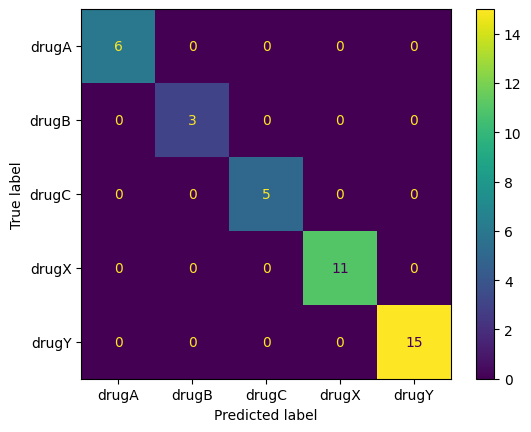

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,x_test,y_test)

[Text(0.625, 0.9, 'x[4] <= 14.829\ngini = 0.68\nsamples = 160\nvalue = [17, 13, 11, 43, 76]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.656\nsamples = 84\nvalue = [17, 13, 11, 43, 0]'),
 Text(0.5625, 0.8, 'True  '),
 Text(0.25, 0.5, 'x[0] <= 50.5\ngini = 0.491\nsamples = 30\nvalue = [17, 13, 0, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\ngini = 0.324\nsamples = 54\nvalue = [0, 0, 11, 43, 0]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\ngini = 0.499\nsamples = 23\nvalue = [0, 0, 11, 12, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 0, 31, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 76\nvalue = [0, 0, 0, 0, 76]'),
 Text(0.6875, 0.8, '  False')]

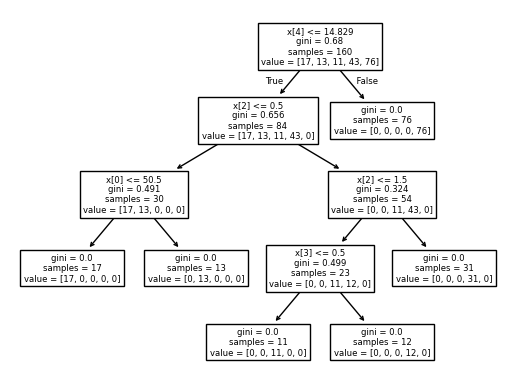

In [20]:
from sklearn import tree
tree.plot_tree(model)

### 4. ****.Given a dataset, write code to split the data into training and testing sets using an 80-20 split.****

In [22]:
#to split a given data into training and testing data

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

def split_data(data):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)   # here choosing test size as 20% of total data so remaining 80% data will be taken as training data.
    return x_train,x_test,y_train,y_test

## Case Study

### **A company wants to predict employee attrition. What kind of ML problem is this? Which algorithms would you choose and why?**

This is a classification problem as we need to predict employee attrition(yes/No).
if the data is simple then we can choose algorithms like logistic regression since it is simple and interpretable for binary classification.

But if the data is complex then its better to choose classifiers like Decision trees or Random forests. These algorithms handle non-linear relationships effectively and are robust to overfitting.

